The aim of this project is to gain a deeper understanding of how a hyperspectral pushbroom instrument performs.

Your task is to carefully read and analyze the information given in this folder, then recreate the following aspects of the pre-launch characterization:
In your recreation, you will need to apply mathematical formulas and models to calculate the instrument's performance metrics. 
You will also need to interpret the results and draw conclusions about the instrument's capabilities and limitations.

All referenced papers are included in the [Supporting Material] folder. In your recreation, you will be using an instrument known as HSI V4. 

This assignment aims to develop your skills in scientific research, data analysis, and problem-solving. By recreating the pre-launch characterization of the HYPSO-1 
hyperspectral imager, you will gain a deeper understanding of the challenges involved in designing and testing satellite instruments.

This Notebook is filled with a module to make a mock spectrogram so that you can test various things before going to the lab.


------
Some of the code you need to complete this project is provided as part of this reposiotory.
The code is developed using conda, and we recomend that you do the same.
Here is a step-by-step guide on how to install conda and create the desired environment.

**Installing Conda**

To get started, you'll need to install conda, which is a package manager for Python. You can do this by following these steps:

1. **For Windows**: Download the Anaconda installer from the official Anaconda website: <https://www.anaconda.com/products/individual>. Choose the "Custom" installation option and select only the "conda" component.
2. **For macOS (using Homebrew)**: Run the following command in your terminal: `brew install anaconda`
3. **For Linux**: You can install conda using a package manager like apt-get or yum, or by downloading the installer from the Anaconda website.

**Creating an Environment**

Once you have installed conda, you can create a new environment to isolate your Python packages and dependencies. Here's how:

1. Open a terminal or command prompt.
2. Type `conda create env -f <path-to-"envirnoment.yml">`
3. Activate the environment by typing `conda activate ttk4265`.
4. You should now see `(ttk4265)` at the beginning of your command prompt, indicating that you are working within the newly created environment.
5. The packages you need should be included then
6. To install other packages or dependencies, use the `conda install` command followed by the package name (e.g., `conda install numpy`).
7. When you're finished working in this environment, deactivate it by typing `conda deactivate`.

In [95]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

from scipy.signal import find_peaks

In [96]:
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# # Test code to display Hyperspectral images

# # base_folder = r'C:\Users\ariaa\Documents\!PhD\Optisk Fjernmåling\TTK4265-assignment1-group1-data'
# # base_folder = r'C:\Users\ariaa\OneDrive - NTNU\!PhD\Optisk Fjernmåling\Optikklab\Code\Assignment_1\Data'
# base_folder = './Data/Ar'
# file_name1 =  '1727163191.770_00000_e999.8941_g008_1936x1216.bip'
# file_name2 =  '1727163193.770_00002_e999.8941_g008_1936x1216.bip'
# file_path1 = os.path.join(base_folder, file_name1)
# file_path2 = os.path.join(base_folder, file_name2)
# base_folder = './Data/Hg'
# file_name3 =  '1727162665.802_00000_e999.8941_g017_1936x1216.bip'
# file_name4 =  '1727162666.802_00001_e999.8941_g017_1936x1216.bip'
# file_path3 = os.path.join(base_folder, file_name3)
# file_path4 = os.path.join(base_folder, file_name4)

# # file_path1 = 'C:/Users/ariaa/Documents/!PhD/Optisk Fjernmåling/TTK4265-assignment1-group1-data/Ar/1727163191.770_00000_e999.8941_g008_1936x1216.bip'
# # file_path3 = 'C:/Users/ariaa/Documents/!PhD/Optisk Fjernmåling/TTK4265-assignment1-group1-data/Ar/1727163193.770_00002_e999.8941_g008_1936x1216.bip'
        
# datacube1 = np.fromfile(file_path1, dtype='uint16')
# datacube2 = np.fromfile(file_path2, dtype='uint16')
# datacube3 = np.fromfile(file_path3, dtype='uint16')
# datacube4 = np.fromfile(file_path4, dtype='uint16')

# # Reshape datacube.
# samples = 1
# bands = 1936
# datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]
# datacube2 = datacube2.reshape((-1, samples, bands))[:,0,::-1]
# datacube3 = datacube3.reshape((-1, samples, bands))[:,0,::-1]
# datacube4 = datacube4.reshape((-1, samples, bands))[:,0,::-1]

# plt.imshow(datacube1)
# plt.figure()
# plt.imshow(datacube2)
# plt.figure()
# plt.imshow(datacube3)
# plt.figure()
# plt.imshow(datacube4)

# # C:\\Users\\ariaa\\OneDrive - NTNU\\!PhD\\Optisk Fjernmåling\\Code\\Assignment_1\\Data\\Ar\\1727163193.770_00002_e999.8941_g008_1936x1216.bip


# Radiometric Calibration - Aria

Questions: 
- was the W of the lamp 100W? and what is then the  [mW/(m^2 nm sr)]
- is exposure time in ms?
- seems that the dark images we have taken have diff exposure time then the radiometric images, what to do?
- Is the output value of the radiometric images in counts?
- When calculating the Spectral calibration RMSE, dont we need the actual spectral lines of Ar and Hg? 

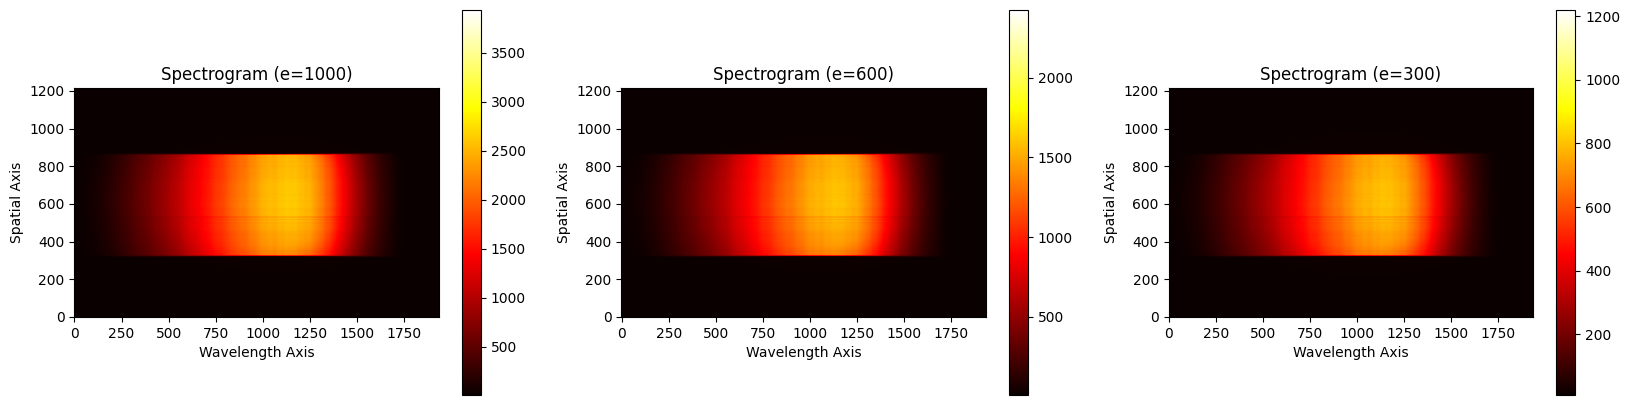

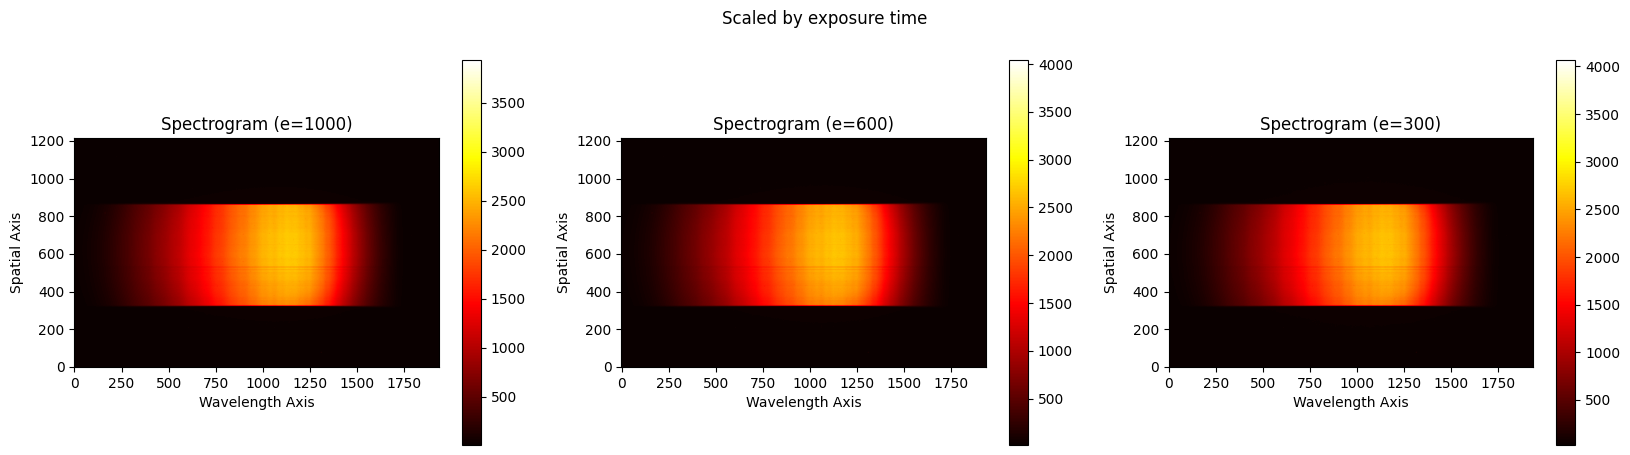

In [97]:
# take avg. image for each exposure


base_folder = r'.\Data\radiometric'
file_list = glob.glob(os.path.join(base_folder, '*'))

samples = 1
bands = 1936
datacube = np.fromfile(file_list[0], dtype='uint16')
avg_cube_e1000 = np.zeros_like(datacube) # init. empty empty average datacube
avg_cube_e600 = np.zeros_like(datacube) # init. empty empty average datacube
avg_cube_e300 = np.zeros_like(datacube) # init. empty empty average datacube

# make avg. image for e=1000
for file in file_list[:10]:
    # print(file)
    datacube = np.fromfile(file, dtype='uint16')
    avg_cube_e1000 += datacube
avg_cube_e1000 = avg_cube_e1000/10
avg_cube_e1000 = avg_cube_e1000.reshape((-1, samples, bands))[:,0,::-1]

# make avg. image for e=600
for file in file_list[10:20]:
    # print(file)
    datacube = np.fromfile(file, dtype='uint16')
    avg_cube_e600 += datacube
avg_cube_e600 = avg_cube_e600/10
avg_cube_e600 = avg_cube_e600.reshape((-1, samples, bands))[:,0,::-1]

# make avg. image for e=300
for file in file_list[20:30]:
    # print(file)
    datacube = np.fromfile(file, dtype='uint16')
    avg_cube_e300 += datacube
avg_cube_e300 = avg_cube_e300/10
avg_cube_e300 = avg_cube_e300.reshape((-1, samples, bands))[:,0,::-1]

# Visualize output-
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(avg_cube_e1000, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=1000)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,2)
plt.imshow(avg_cube_e600, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=600)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,3)
plt.imshow(avg_cube_e300, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()


# Visualize normalized output
plt.figure(figsize=(20,5))
plt.suptitle('Scaled by exposure time')
plt.subplot(1,3,1)
plt.imshow(avg_cube_e1000/1, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=1000)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,2)
plt.imshow(avg_cube_e600/0.6, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=600)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,3)
plt.imshow(avg_cube_e300/0.3, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()


K = LS <br>
L = 100

### Find edges in image

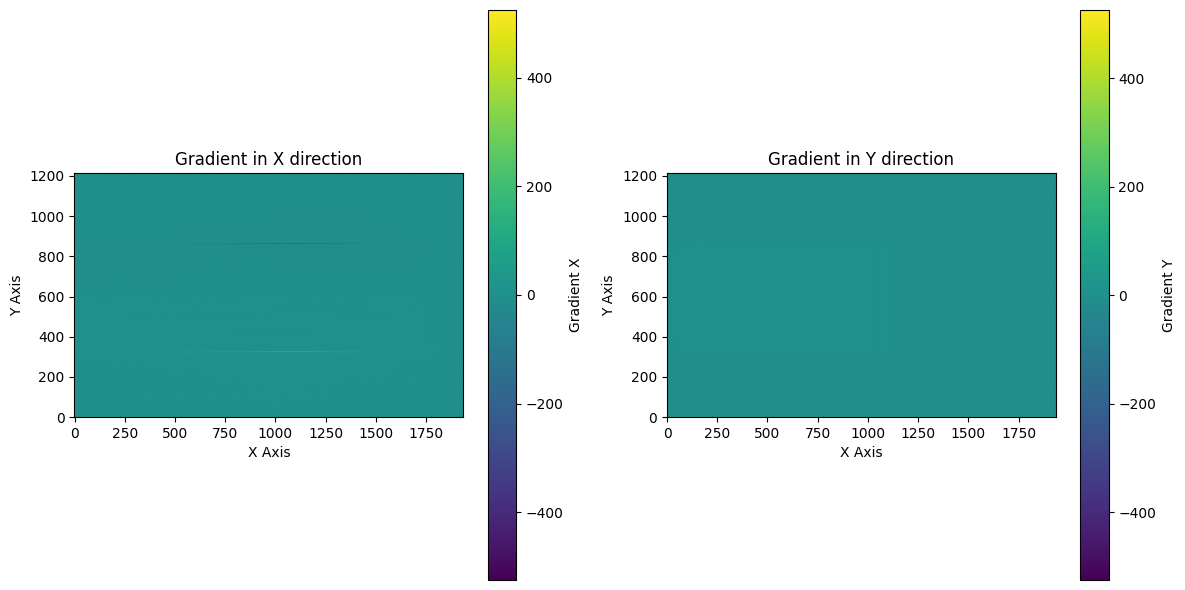

Edge at: 323 and 860


In [98]:
# Find where the edges in the image are
gradient_x, gradient_y = np.gradient(avg_cube_e300)

# Visualize the gradients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gradient_x, cmap='viridis', origin='lower')
plt.colorbar(label='Gradient X')
plt.title('Gradient in X direction')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.subplot(1, 2, 2)
plt.imshow(gradient_y, cmap='viridis', origin='lower')
plt.colorbar(label='Gradient Y')
plt.title('Gradient in Y direction')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.tight_layout()
plt.show()

print(f'Edge at: {np.argmax(gradient_x[:,1000])} and {np.argmin(gradient_x[:,1000])}')

### Calculate K

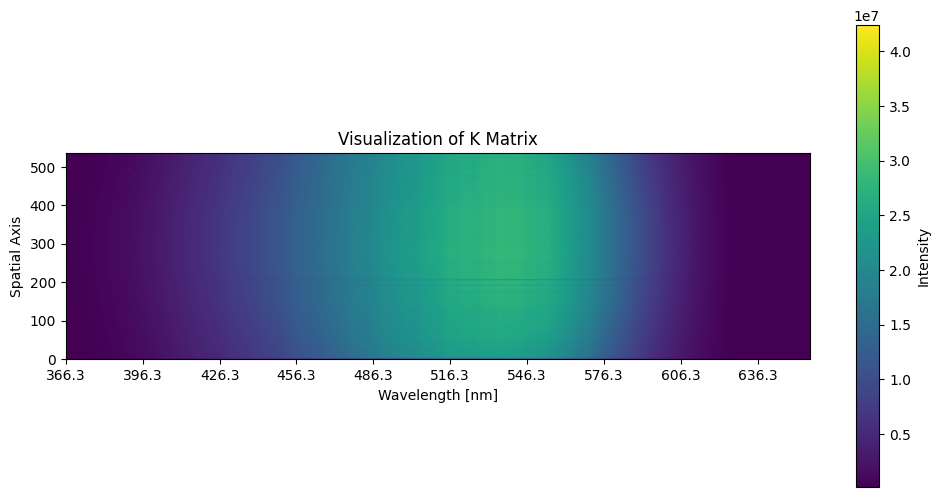

In [99]:
# calculate the K's
edge1=323 
edge2=860 
# L = 100
L = 16777.6

avg_avg_cube = 1/3 * (avg_cube_e300 + avg_cube_e600 + avg_cube_e1000)
K = avg_avg_cube[edge1:edge2,:] * L

# Visualize the matrix K
plt.figure(figsize=(12, 6))
plt.imshow(K, cmap='viridis', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Visualization of K Matrix')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Spatial Axis')
x_ticks = np.arange(0, bands, 200)  # Custom tick locations
x_labels = 366.3 + x_ticks * 0.15  # Custom tick labels
plt.xticks(ticks=x_ticks, labels=np.round(x_labels, 2))
plt.show()

### Verify coefficients

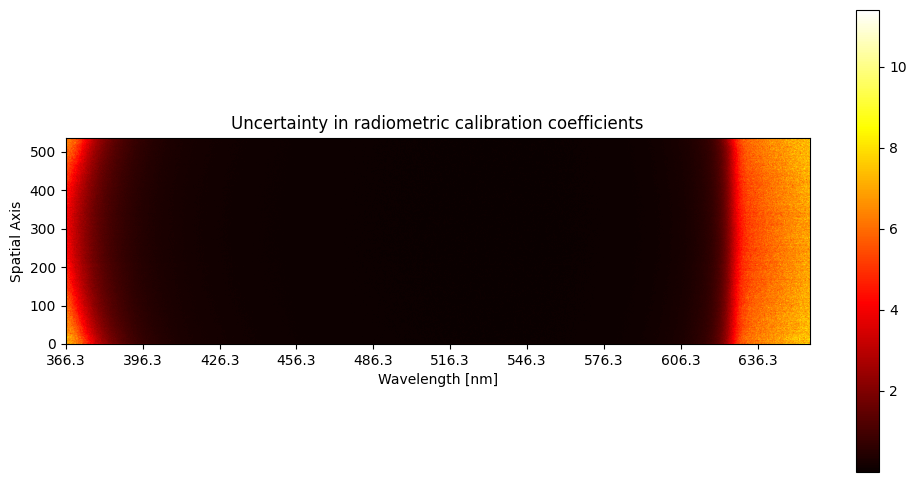

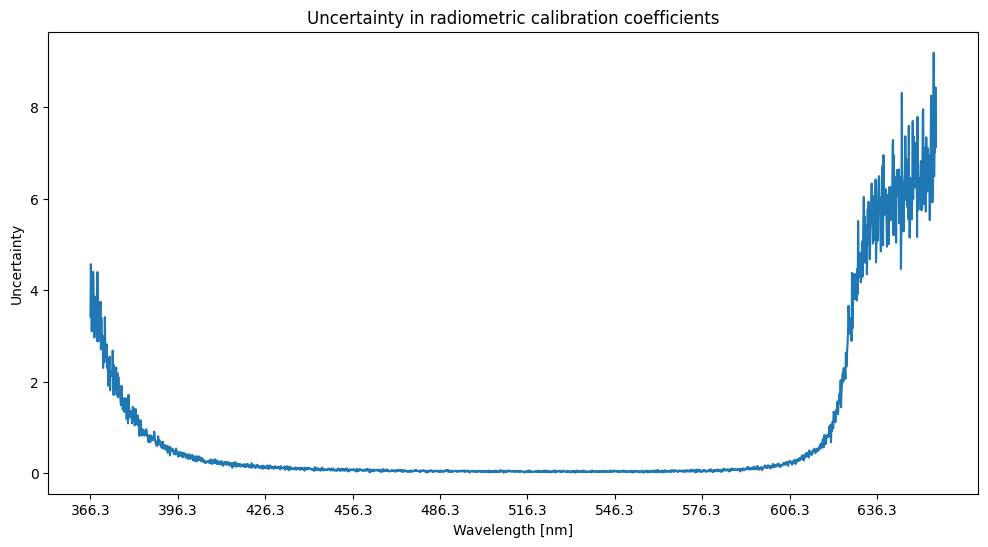

In [100]:
# verify coefficients

base_folder = r'.\Data\radiometric-verify'
file_list = glob.glob(os.path.join(base_folder, '*'))

samples = 1
bands = 1936
datacube = np.fromfile(file_list[0], dtype='uint16')
datacube = datacube.reshape((-1, samples, bands))[edge1:edge2,0,::-1]
avg_cube = np.zeros_like(datacube).astype(float) # init. empty empty average datacube

exposures = [20, 40, 60, 80, 100, 200, 400, 600, 800, 1000]

for i in range(10):
    datacube = np.fromfile(file_list[i+1], dtype='uint16')
    datacube = datacube.reshape((-1, samples, bands))[edge1:edge2,0,::-1]
    avg_cube += 1/10 * datacube / (exposures[i]/1000)
# avg_cube = avg_cube.reshape((-1, samples, bands))[:,0,::-1]

avg_L = K/avg_cube
img_L = K/datacube

uncertainty = np.abs( (avg_L-img_L)/avg_L) # equation from lab doc. 

x_ticks = np.arange(0, bands, 200)  # Custom tick locations
x_labels = 366.3 + x_ticks * 0.15  # Custom tick labels

plt.figure(figsize=(12,6))
plt.imshow(uncertainty, cmap='hot', origin='lower')
plt.colorbar()
plt.title('Uncertainty in radiometric calibration coefficients')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Spatial Axis')
plt.xticks(ticks=x_ticks, labels=np.round(x_labels, 2))
plt.show()

plt.figure(figsize=(12,6))
plt.plot(uncertainty[300])
plt.title('Uncertainty in radiometric calibration coefficients')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Uncertainty')
plt.xticks(ticks=x_ticks, labels=np.round(x_labels, 2))
plt.show()

# Spectral Calibration

## Base code:

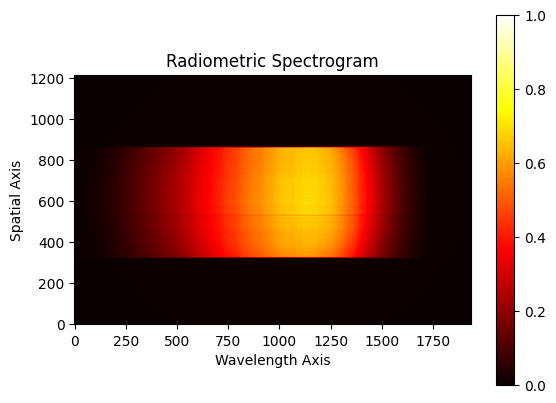

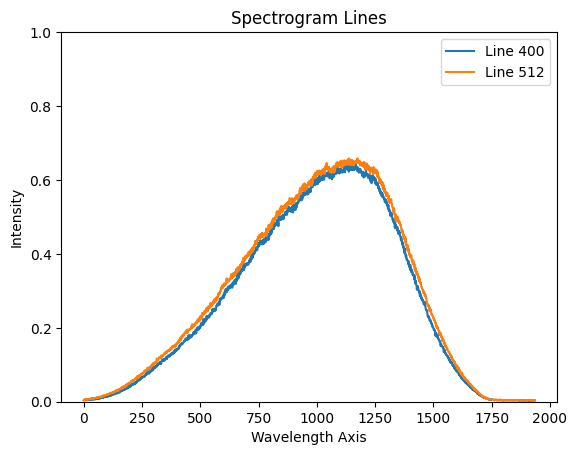

In [101]:

# from mock import create_fake_spectrogram
# from mock import save_spectrogram_as_png


base_folder = r'.\Data\radiometric'
file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = datacube1/(np.max(datacube1)-np.min(datacube1))

plt.imshow(datacube1, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Radiometric Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'uniform_mock_spectrogram.png')
# save_spectrogram_as_png(spectrogram, filename)

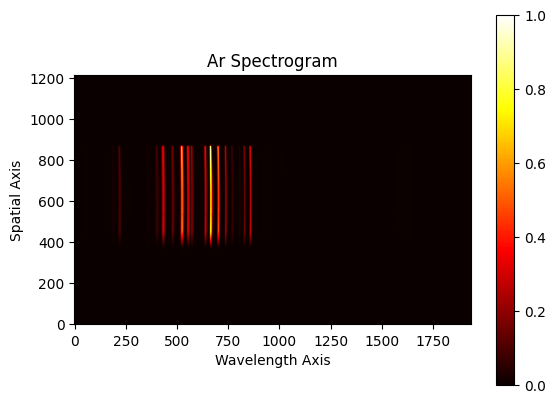

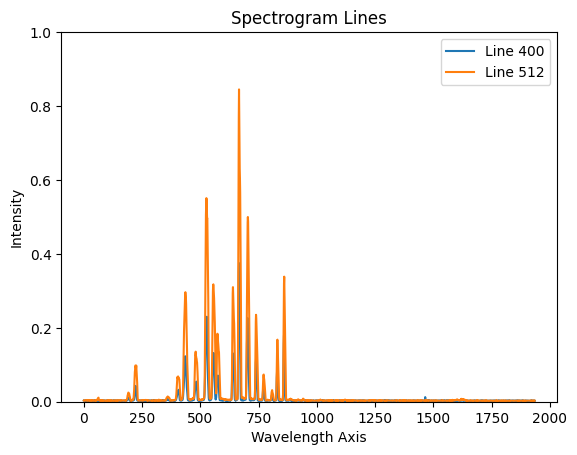

In [102]:
# spectral_lines_list = [
#     # index, amplitude, and FWHM
#     (100, 0.3, 5),
#     (312, 0.6, 3),
#     (700, 0.8, 2),
# ]

# spectrogram = create_fake_spectrogram(1024, 1024, 
#                                       profile="stripes", 
#                                       smile=True, vignetting=False, 
#                                       noise=False, 
#                                       spectral_lines=spectral_lines_list)

# base_folder = r'.\Data\radiometric'
# file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
base_folder = './Data/Ar'
file_name1 =  '1727163191.770_00000_e999.8941_g008_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = datacube1/(np.max(datacube1)-np.min(datacube1))


plt.imshow(datacube1, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Ar Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'striped_mock_spectrogram.png')
# save_spectrogram_as_png(datacube1, filename)

## Do exercises:

### Emission lines Ar and Hg side by side

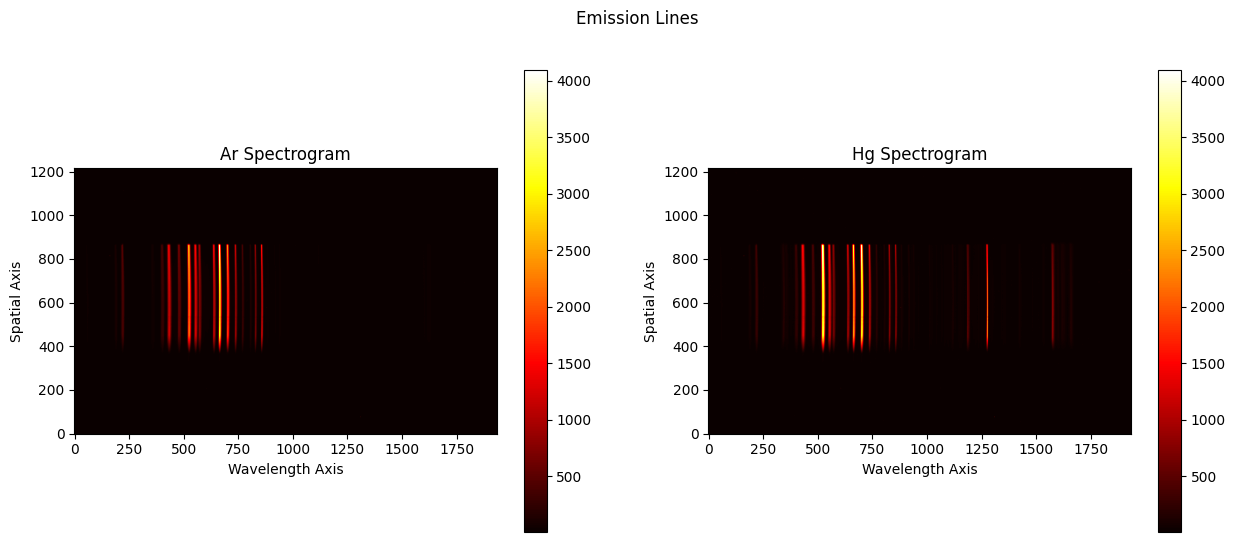

In [103]:
base_folder = './Data/Ar'
file_name1 =  '1727163191.770_00000_e999.8941_g008_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)
# get datacube
datacube_ar = np.fromfile(file_path1, dtype='uint16')
# Reshape datacube.
samples = 1
bands = 1936
datacube_ar = datacube_ar.reshape((-1, samples, bands))[:,0,::-1]


base_folder = './Data/Hg'
file_name1 =  '1727162665.802_00000_e999.8941_g017_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)
# get datacube
datacube_hg = np.fromfile(file_path1, dtype='uint16')
# Reshape datacube.
samples = 1
bands = 1936
datacube_hg = datacube_hg.reshape((-1, samples, bands))[:,0,::-1]


# datacube_ar = datacube_ar/(np.max(datacube_ar)-np.min(datacube_ar))

plt.figure(figsize=(15,6))
plt.suptitle('Emission Lines')
plt.subplot(1,2,1)
plt.imshow(datacube_ar, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Ar Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')

plt.subplot(1,2,2)
plt.imshow(datacube_hg, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Hg Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

### Argon(Ar)

[0.28973105 0.300489   0.31540342 0.3195599  0.47261614 0.79144254
 0.53276284]


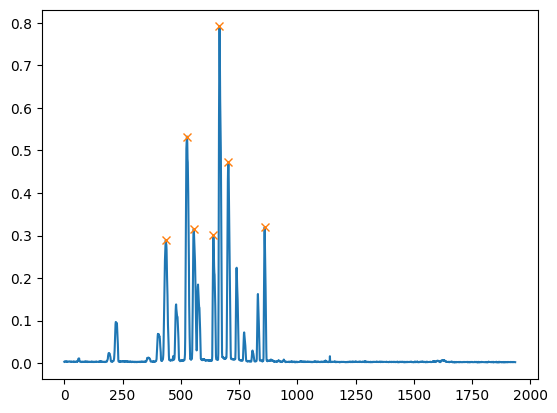

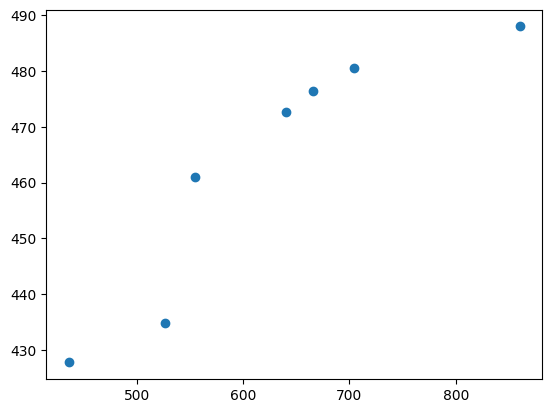

In [104]:
argon_wavelengths = np.array([4277.528, 4348.064, 4609.567, 4726.868, 4764.865, 4806.020, 4879.864])/10 # divide by 10 since it is given in Å

num_peaks = argon_wavelengths.shape[0]

peaks, _ = find_peaks(datacube1[600]) # 

plt.plot(datacube1[600])#
# plt.plot(peaks, datacube1[600][peaks], "x")

peak_array = datacube1[600][peaks]

peak_values = np.partition(peak_array, -num_peaks)[-num_peaks:]
print(np.partition(peak_array, -num_peaks)[-num_peaks:])

# for point in datacube1[600]: if point in peak_values: print(point)
final_points = []
for i in range(len(datacube1[600])):
    if datacube1[600][i] in peak_values and i in peaks: 
        final_points.append(i)

# del final_points[4]

plt.plot(final_points, datacube1[600][final_points], "x")

plt.figure()
plt.scatter(final_points, argon_wavelengths)


Coefficients: [0.15433106]
Intercept: 366.2961291158603
Root Mean squared error (Linear):      8.83
Root Mean squared error (Poly2):       5.93
Root Mean squared error (Poly3):       5.38
Root Mean squared error (Ridge Poly2): 5.93


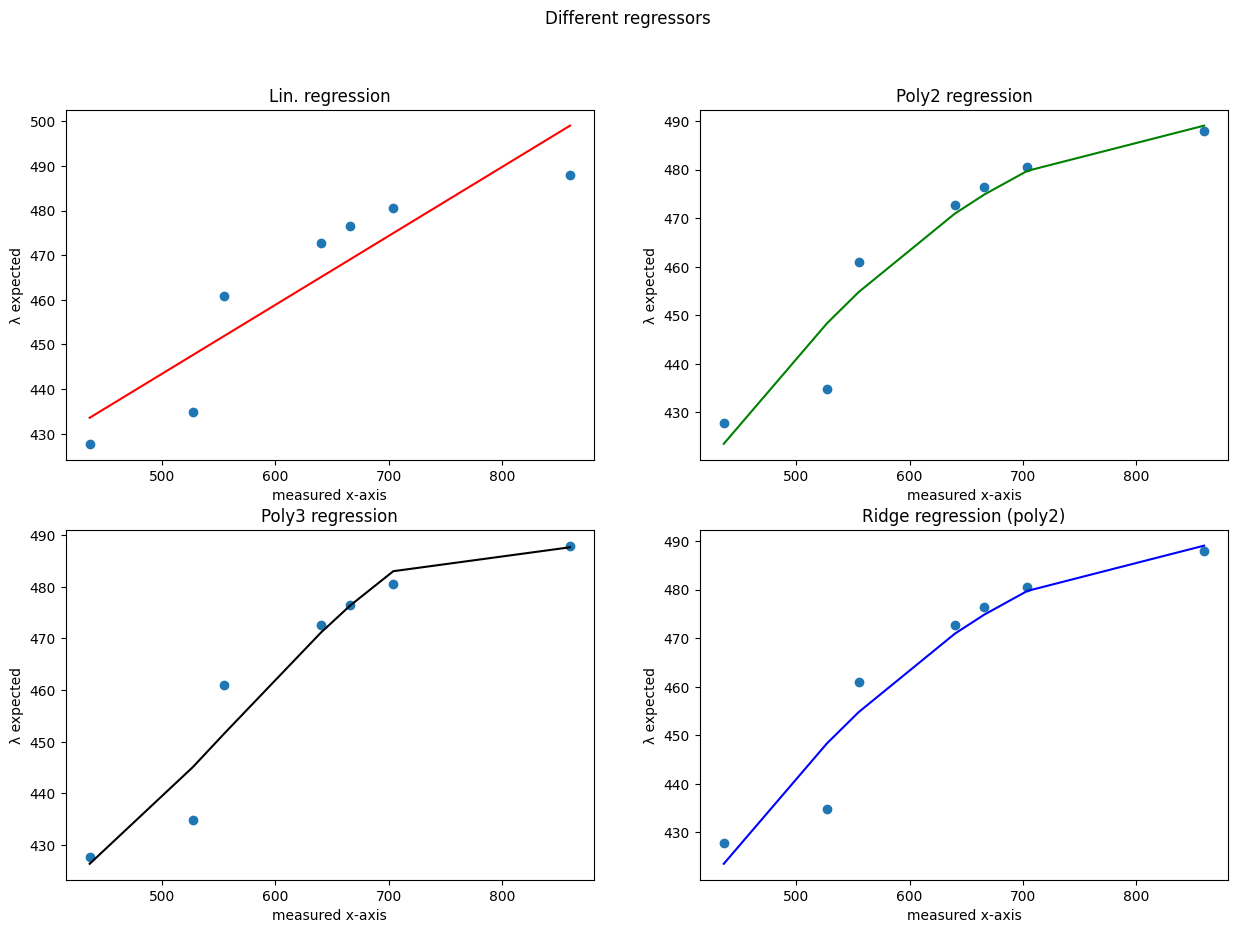

In [105]:
from useful_functions import *
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

x = np.array(final_points).reshape(-1,1)
y = np.array(argon_wavelengths)

model = LinearRegression().fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# y_pred = plynominal_model(2,observed_wavelengths, argon_wavelengths)

# y_pred = np.arange(300,1000)*model.coef_ + model.intercept_
y_pred = model.predict(x)

# Polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression().fit(x_poly, y)
y_pred_poly2 = model.predict(x_poly)

# Polynomial (degree 3)
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
model = LinearRegression().fit(x_poly, y)
y_pred_poly3 = model.predict(x_poly)

# Ridge Regression (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
ridge_model = Ridge(alpha=1.0).fit(x_poly, y)
y_pred_ridge_poly2 = ridge_model.predict(x_poly)

# Plot the results
plt.figure(figsize=(15,10))
plt.suptitle('Different regressors')
plt.subplot(2,2,1)
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
# plt.legend(['Data', 'Linear'])
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.title('Lin. regression')
plt.subplot(2,2,2)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_poly2, 'g')
# plt.legend(['Data', 'Poly2'])
plt.title('Poly2 regression')
plt.subplot(2,2,3)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_poly3, color='black')
# plt.legend(['Data', 'Poly3', ])
plt.title('Poly3 regression')
plt.subplot(2,2,4)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_ridge_poly2, 'b')
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
# plt.legend(['Data', 'Ridge Poly2'])
plt.title('Ridge regression (poly2)')

# Print mean squared errors
print("Root Mean squared error (Linear):      %.2f" % np.sqrt(mean_squared_error(y, y_pred)))
print("Root Mean squared error (Poly2):       %.2f" % np.sqrt(mean_squared_error(y, y_pred_poly2)))
print("Root Mean squared error (Poly3):       %.2f" % np.sqrt(mean_squared_error(y, y_pred_poly3)))
print("Root Mean squared error (Ridge Poly2): %.2f" % np.sqrt(mean_squared_error(y, y_pred_ridge_poly2)))

plt.show()


### Mercury(Hg)

Do Mercury spectral calibration 

[ 978 1284 1061 1299 3362 2563 3375 2489]


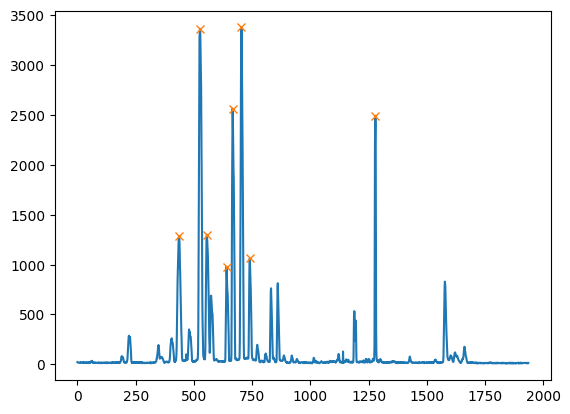

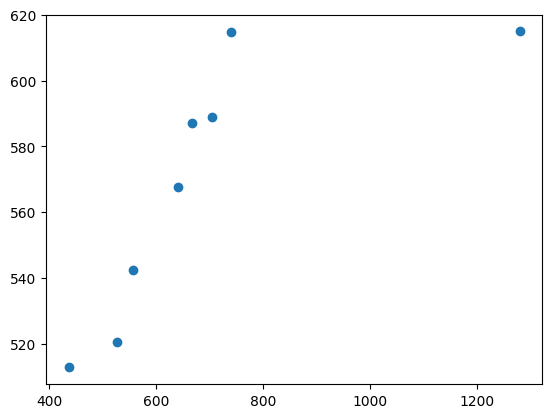

In [106]:
mercury_wavelengths =  np.array([ 5128.442, 5204.768, 5425.253, 5677.105, 5871.279,  5888.939, 6146.435, 6149.475])/10

base_folder = './Data/Hg'
file_name1 =  '1727162665.802_00000_e999.8941_g017_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube_hg = np.fromfile(file_path1, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube_hg = datacube_hg.reshape((-1, samples, bands))[:,0,::-1]

num_peaks = mercury_wavelengths.shape[0]

peaks, _ = find_peaks(datacube_hg[600])
# print(peaks)

plt.plot(datacube_hg[600])#[500:600])
# plt.plot(peaks, datacube_hg[600][peaks], "x")

peak_array = datacube_hg[600][peaks]

peak_values = np.partition(peak_array, -num_peaks)[-num_peaks:]
print(np.partition(peak_array, -num_peaks)[-num_peaks:])

# for point in datacube_hg[600]: if point in peak_values: print(point)
final_points = []
for i in range(len(datacube_hg[600])):
    if datacube_hg[600][i] in peak_values and i in peaks: 
        final_points.append(i)

# del final_points[4]

plt.plot(final_points, datacube_hg[600][final_points], "x")

plt.figure()
plt.scatter(final_points, mercury_wavelengths)


Coefficients: [0.11912403]
Intercept: 486.0485762219614
Root Mean squared error (Linear):      23.91
Root Mean squared error (Poly2):       9.60
Root Mean squared error (Poly3):       5.09
Root Mean squared error (Ridge Poly2): 9.60


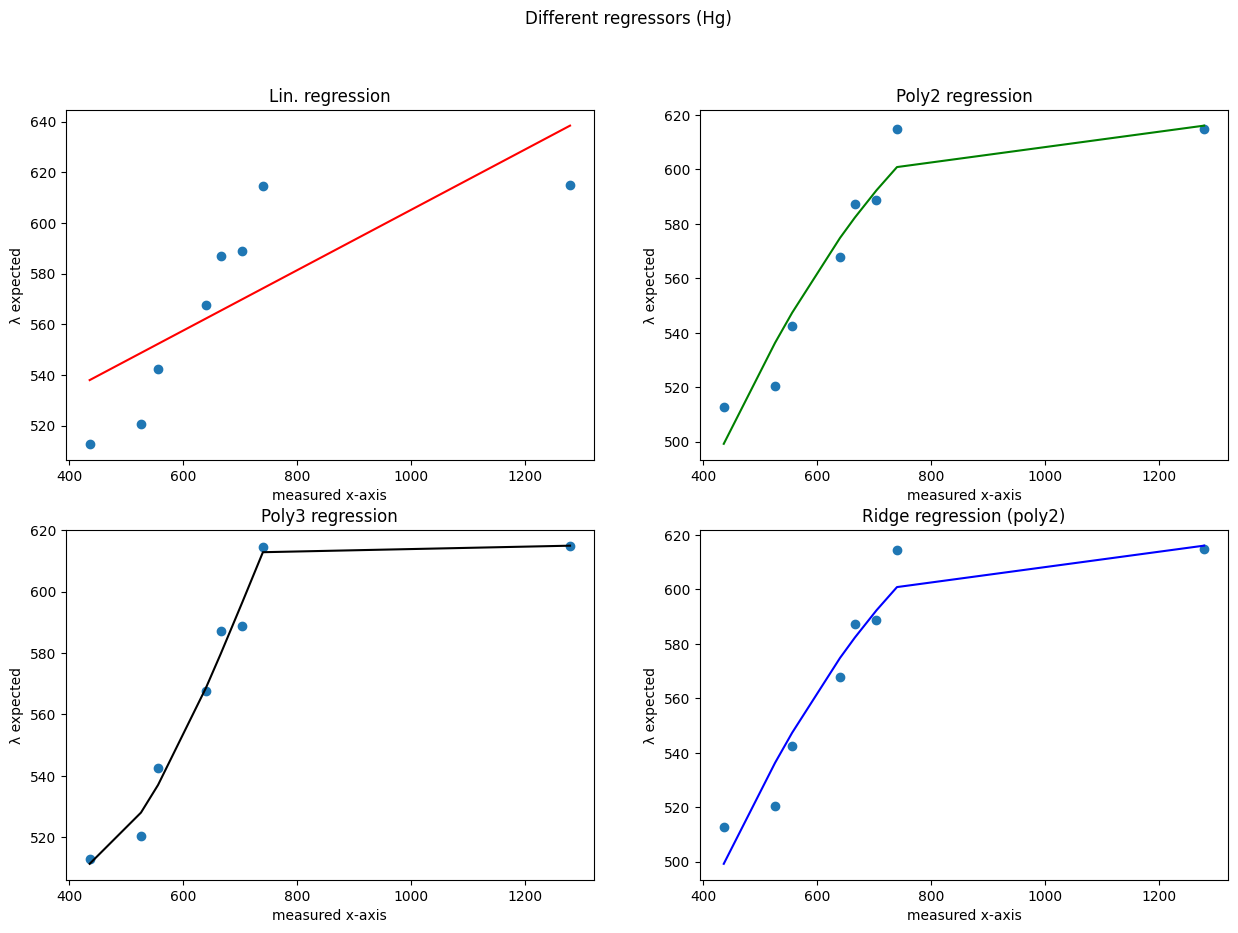

In [107]:
from useful_functions import *
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

x = np.array(final_points).reshape(-1,1)
y = np.array(mercury_wavelengths)

model = LinearRegression().fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# y_pred = plynominal_model(2,observed_wavelengths, argon_wavelengths)

# y_pred = np.arange(300,1000)*model.coef_ + model.intercept_
y_pred = model.predict(x)

# Polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression().fit(x_poly, y)
y_pred_poly2 = model.predict(x_poly)

# Polynomial (degree 3)
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
model = LinearRegression().fit(x_poly, y)
y_pred_poly3 = model.predict(x_poly)

# Ridge Regression (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
ridge_model = Ridge(alpha=1.0).fit(x_poly, y)
y_pred_ridge_poly2 = ridge_model.predict(x_poly)

# Plot the results
plt.figure(figsize=(15,10))
plt.suptitle('Different regressors (Hg)')
plt.subplot(2,2,1)
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
# plt.legend(['Data', 'Linear'])
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.title('Lin. regression')
plt.subplot(2,2,2)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_poly2, 'g')
# plt.legend(['Data', 'Poly2'])
plt.title('Poly2 regression')
plt.subplot(2,2,3)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_poly3, color='black')
# plt.legend(['Data', 'Poly3', ])
plt.title('Poly3 regression')
plt.subplot(2,2,4)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_ridge_poly2, 'b')
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
# plt.legend(['Data', 'Ridge Poly2'])
plt.title('Ridge regression (poly2)')

# Print mean squared errors
print("Root Mean squared error (Linear):      %.2f" % np.sqrt(mean_squared_error(y, y_pred)))
print("Root Mean squared error (Poly2):       %.2f" % np.sqrt(mean_squared_error(y, y_pred_poly2)))
print("Root Mean squared error (Poly3):       %.2f" % np.sqrt(mean_squared_error(y, y_pred_poly3)))
print("Root Mean squared error (Ridge Poly2): %.2f" % np.sqrt(mean_squared_error(y, y_pred_ridge_poly2)))

plt.show()


# Noise stuff?

In [108]:
# Extract the y-values from the datacube1 at index 600
y_values = datacube1[600]
positions = np.argpartition(y_values, -10)[-10:]

# Get the 10 largest values
largest_y_values = np.partition(y_values, -10)[-10:]

# Sort the values in descending order
largest_y_values = np.sort(largest_y_values)[::-1]

# Create a new array with these values
largest_y_values_array = np.array(largest_y_values)

print(largest_y_values_array)
print(positions)

[0.79144254 0.78239609 0.699022   0.69022005 0.6207824  0.58141809
 0.57334963 0.5594132  0.53276284 0.53178484]
[526 527 669 664 670 671 668 667 665 666]


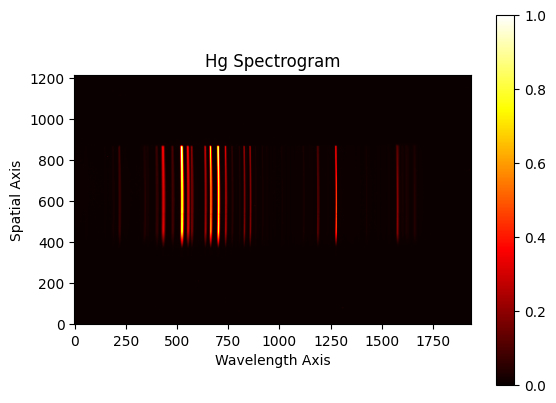

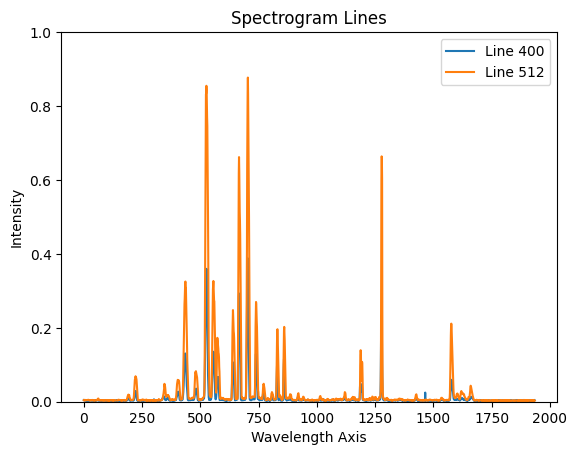

In [109]:
# spectral_lines_list = [
#     # index, amplitude, and FWHM
#     (100, 0.3, 5),
#     (312, 0.6, 3),
#     (700, 0.8, 2),
# ]

# spectrogram = create_fake_spectrogram(1024, 1024, 
#                                       profile="stripes", 
#                                       smile=True, vignetting=False, 
#                                       noise=False, 
#                                       spectral_lines=spectral_lines_list)

# base_folder = r'.\Data\radiometric'
# file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
base_folder = './Data/Hg'
file_name1 =  '1727162665.802_00000_e999.8941_g017_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = datacube1/(np.max(datacube1)-np.min(datacube1))


plt.imshow(datacube1, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Hg Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'striped_mock_spectrogram.png')
# save_spectrogram_as_png(datacube1, filename)

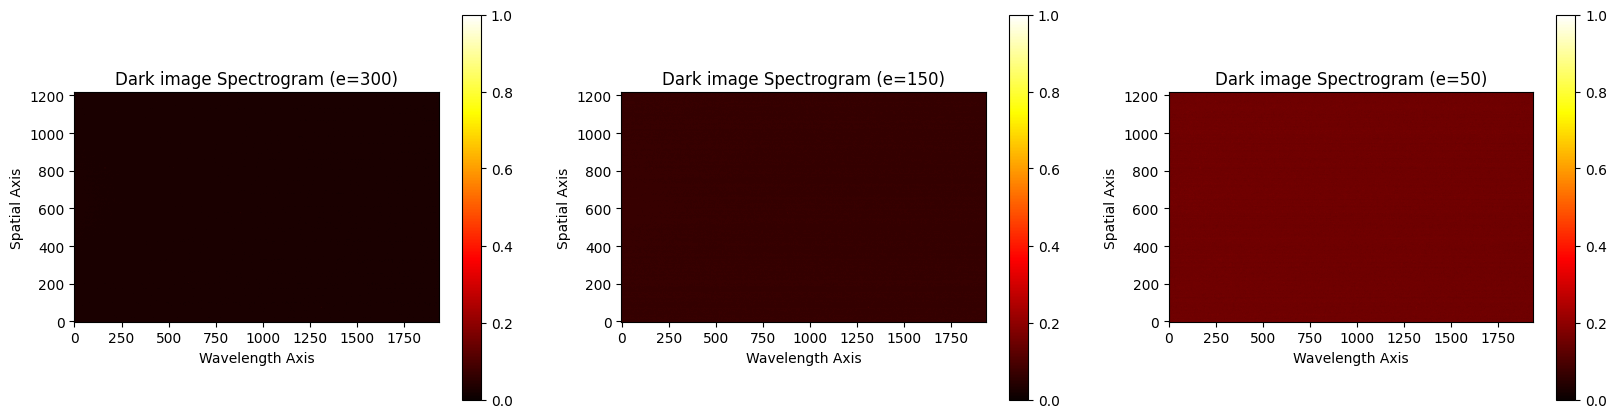

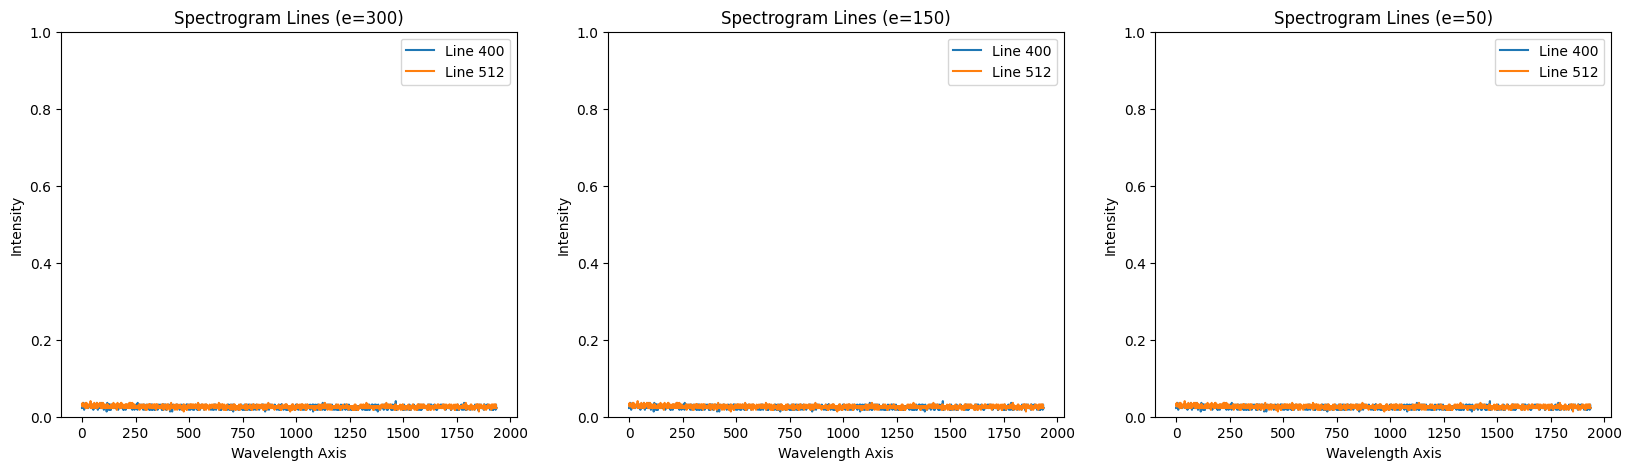

In [110]:
# spectral_lines_list = [
#     # index, amplitude, and FWHM
#     (100, 0.3, 5),
#     (312, 0.6, 3),
#     (700, 0.8, 2),
# ]

# spectrogram = create_fake_spectrogram(1024, 1024, 
#                                       profile="stripes", 
#                                       smile=True, vignetting=False, 
#                                       noise=False, 
#                                       spectral_lines=spectral_lines_list)

# base_folder = r'.\Data\radiometric'
# file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
base_folder = './Data/dark-images'
file_name1 =  '1727161965.569_00000_e300.0016_g000_1936x1216.bip'
file_name2 =  '1727162016.993_00000_e150.0014_g000_1936x1216.bip'
file_name3 =  '1727162044.101_00000_e049.9971_g000_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)
file_path2 = os.path.join(base_folder, file_name2)
file_path3 = os.path.join(base_folder, file_name3)

datacube1 = np.fromfile(file_path1, dtype='uint16')
datacube2 = np.fromfile(file_path2, dtype='uint16')
datacube3 = np.fromfile(file_path3, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]
datacube2 = datacube2.reshape((-1, samples, bands))[:,0,::-1]
datacube3 = datacube3.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = (datacube1 - np.min([datacube1, datacube2, datacube3]))/(np.max([datacube1, datacube2, datacube3])-np.min([datacube1, datacube2, datacube3]))
datacube2 = (datacube2 - np.min([datacube1, datacube2, datacube3]))/(np.max([datacube1, datacube2, datacube3])-np.min([datacube1, datacube2, datacube3]))
datacube3 = (datacube3 - np.min([datacube1, datacube2, datacube3]))/(np.max([datacube1, datacube2, datacube3])-np.min([datacube1, datacube2, datacube3]))

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(datacube1, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Dark image Spectrogram (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()
plt.subplot(1,3,2)
plt.imshow(datacube2, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Dark image Spectrogram (e=150)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()
plt.subplot(1,3,3)
plt.imshow(datacube3, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Dark image Spectrogram (e=50)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()


plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
# plt.show()
plt.subplot(1,3,2)
# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines (e=150)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
# plt.show()
plt.subplot(1,3,3)
# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines (e=50)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'striped_mock_spectrogram.png')
# save_spectrogram_as_png(datacube1, filename)

In [111]:
np.max(datacube1), np.max(datacube2), np.max(datacube3), np.min([datacube1, datacube2, datacube3])

(1.0, 1.0, 1.0, 0.0)

((array([2.354149e+06, 1.700000e+01, 5.000000e+00, 2.000000e+00,
         0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
         0.000000e+00, 2.000000e+00]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <BarContainer object of 10 artists>),
 (array([2.354138e+06, 2.500000e+01, 8.000000e+00, 2.000000e+00,
         0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 2.000000e+00]),
  array([0.03125 , 0.128125, 0.225   , 0.321875, 0.41875 , 0.515625,
         0.6125  , 0.709375, 0.80625 , 0.903125, 1.      ]),
  <BarContainer object of 10 artists>),
 (array([2.197763e+06, 1.563880e+05, 1.300000e+01, 4.000000e+00,
         3.000000e+00, 2.000000e+00, 0.000000e+00, 1.000000e+00,
         1.000000e+00, 1.000000e+00]),
  array([0.07272727, 0.16545455, 0.25818182, 0.35090909, 0.44363636,
         0.53636364, 0.62909091, 0.72181818, 0.81454545, 0.90727273,
         1.        ]),
  <BarContainer object of 10 artists>))

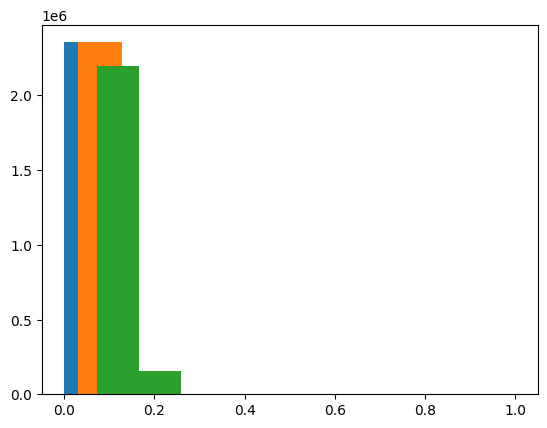

In [112]:
plt.hist(datacube1.flatten()), plt.hist(datacube2.flatten()), plt.hist(datacube3.flatten())

# Sensor Noise

C:\Users\Rebecca Flugstad\AppData\Local\Temp\ipykernel_18984\4061372178.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread(os.path.join(folder_path, filename))
c:\Users\Rebecca Flugstad\AppData\Local\Programs\Python\Python310\lib\site-packages\imageio\plugins\spe.py:507: UserWarning: The file header of c:\Optisk_fjernmaling\Spectral_lab\code\NTNU TTK4265 ASSIGNMENT TEMPLATE\Code\Assignment_1\optikkLab\Code\Assignment_1\Data\dark-images\1727161966.569_00002_e300.0016_g000_1936x1216.bip claims there are 524296 frames, but there are actually 21001 frames.
  warnings.warn(
c:\Users\Rebecca Flugstad\AppData\Local\Programs\Python\Python310\lib\site-packages\imageio\plugins\spe.py:507: UserWarning: The file header of c:\Optisk_fjernmaling\Spectral_lab\code\NTNU TTK4265 ASS

Error loading image 1727161965.569_00000_e300.0016_g000_1936x1216.bip: 'NoneType' object has no attribute 'mode'
Error loading image 1727161966.069_00001_e300.0016_g000_1936x1216.bip: 'NoneType' object has no attribute 'mode'
Loaded image: 1727161966.569_00002_e300.0016_g000_1936x1216.bip, Exposure Time: 300.0016s
Error loading image 1727161967.069_00003_e300.0016_g000_1936x1216.bip: bad PCX image size
Loaded image: 1727161967.569_00004_e300.0016_g000_1936x1216.bip, Exposure Time: 300.0016s
Error loading image 1727161968.069_00005_e300.0016_g000_1936x1216.bip: Could not find a backend to open `Data\dark-images\1727161968.069_00005_e300.0016_g000_1936x1216.bip`` with iomode `ri`.
Error loading image 1727161968.569_00006_e300.0016_g000_1936x1216.bip: Could not find a backend to open `Data\dark-images\1727161968.569_00006_e300.0016_g000_1936x1216.bip`` with iomode `ri`.
Error loading image 1727161969.069_00007_e300.0016_g000_1936x1216.bip: Could not find a backend to open `Data\dark-image

C:\Users\Rebecca Flugstad\AppData\Local\Temp\ipykernel_18984\4061372178.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread(os.path.join(folder_path, filename))
c:\Users\Rebecca Flugstad\AppData\Local\Programs\Python\Python310\lib\site-packages\imageio\plugins\spe.py:507: UserWarning: The file header of c:\Optisk_fjernmaling\Spectral_lab\code\NTNU TTK4265 ASSIGNMENT TEMPLATE\Code\Assignment_1\optikkLab\Code\Assignment_1\Data\dark-images\1727162016.993_00000_e150.0014_g000_1936x1216.bip claims there are 524295 frames, but there are actually 16334 frames.
  warnings.warn(
c:\Users\Rebecca Flugstad\AppData\Local\Programs\Python\Python310\lib\site-packages\imageio\plugins\spe.py:507: UserWarning: The file header of c:\Optisk_fjernmaling\Spectral_lab\code\NTNU TTK4265 ASS

Error loading image 1727162019.489_00005_e150.0014_g000_1936x1216.bip: Could not find a backend to open `Data\dark-images\1727162019.489_00005_e150.0014_g000_1936x1216.bip`` with iomode `ri`.
Error loading image 1727162019.989_00006_e150.0014_g000_1936x1216.bip: Could not find a backend to open `Data\dark-images\1727162019.989_00006_e150.0014_g000_1936x1216.bip`` with iomode `ri`.
Error loading image 1727162020.489_00007_e150.0014_g000_1936x1216.bip: Could not find a backend to open `Data\dark-images\1727162020.489_00007_e150.0014_g000_1936x1216.bip`` with iomode `ri`.
Error loading image 1727162020.989_00008_e150.0014_g000_1936x1216.bip: 'NoneType' object has no attribute 'mode'
Loaded image: 1727162021.489_00009_e150.0014_g000_1936x1216.bip, Exposure Time: 150.0014s
Error loading image 1727162044.101_00000_e049.9971_g000_1936x1216.bip: 'NoneType' object has no attribute 'mode'
Error loading image 1727162044.601_00001_e049.9971_g000_1936x1216.bip: Could not find a backend to open `Dat

c:\Users\Rebecca Flugstad\AppData\Local\Programs\Python\Python310\lib\site-packages\imageio\plugins\spe.py:507: UserWarning: The file header of c:\Optisk_fjernmaling\Spectral_lab\code\NTNU TTK4265 ASSIGNMENT TEMPLATE\Code\Assignment_1\optikkLab\Code\Assignment_1\Data\dark-images\1727162021.489_00009_e150.0014_g000_1936x1216.bip claims there are 589832 frames, but there are actually 21001 frames.
  warnings.warn(
c:\Users\Rebecca Flugstad\AppData\Local\Programs\Python\Python310\lib\site-packages\imageio\plugins\spe.py:507: UserWarning: The file header of c:\Optisk_fjernmaling\Spectral_lab\code\NTNU TTK4265 ASSIGNMENT TEMPLATE\Code\Assignment_1\optikkLab\Code\Assignment_1\Data\dark-images\1727162047.101_00006_e049.9971_g000_1936x1216.bip claims there are 524296 frames, but there are actually 16334 frames.
  warnings.warn(
c:\Users\Rebecca Flugstad\AppData\Local\Programs\Python\Python310\lib\site-packages\imageio\plugins\spe.py:507: UserWarning: The file header of c:\Optisk_fjernmaling\Sp

Error loading image 1727162047.601_00007_e049.9971_g000_1936x1216.bip: Could not find a backend to open `Data\dark-images\1727162047.601_00007_e049.9971_g000_1936x1216.bip`` with iomode `ri`.
Loaded image: 1727162048.101_00008_e049.9971_g000_1936x1216.bip, Exposure Time: 49.9971s
Loaded image: 1727162048.601_00009_e049.9971_g000_1936x1216.bip, Exposure Time: 49.9971s
Exposure Time: 300.0016s - Mean: 561745.77, Std Dev: 49319.04
Exposure Time: 300.0016s - Mean: 544776.55, Std Dev: 47591.35
Exposure Time: 150.0014s - Mean: 546141.54, Std Dev: 54613.47
Exposure Time: 150.0014s - Mean: 537039.56, Std Dev: 49621.74
Exposure Time: 150.0014s - Mean: 531578.06, Std Dev: 48301.91
Exposure Time: 150.0014s - Mean: 539510.12, Std Dev: 55375.68
Exposure Time: 49.9971s - Mean: 554333.60, Std Dev: 53440.26
Exposure Time: 49.9971s - Mean: 558884.90, Std Dev: 52351.69
Exposure Time: 49.9971s - Mean: 554085.55, Std Dev: 55321.82


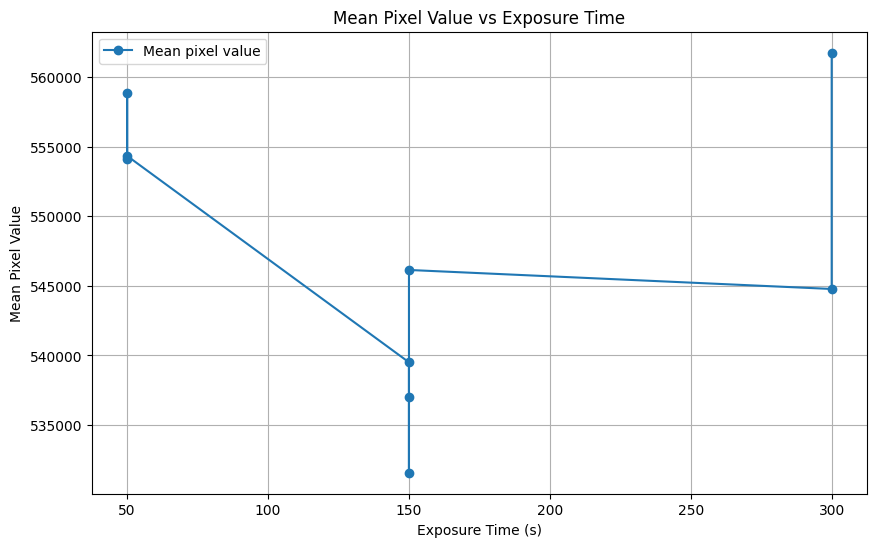

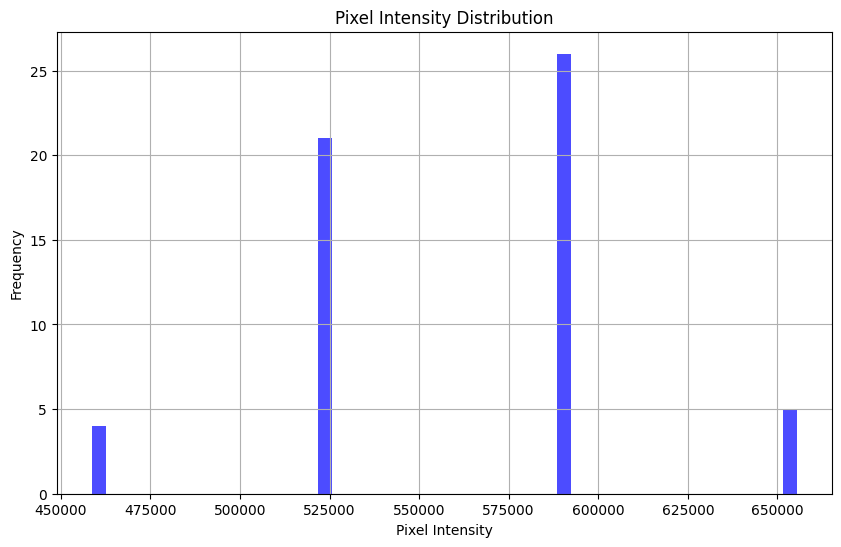

In [118]:
base_folder = './Data/dark-images'
file_name1 =  '1727161965.569_00000_e300.0016_g000_1936x1216.bip'

file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')
# Function to compute mean, standard deviation, and pixel variations
def analyze_dark_images(images, exposure_times):
    means = []
    std_devs = []
    
    for img, exposure in zip(images, exposure_times):
        mean_val = np.mean(img)
        std_val = np.std(img)
        
        means.append(mean_val)
        std_devs.append(std_val)
        
        print(f"Exposure Time: {exposure}s - Mean: {mean_val:.2f}, Std Dev: {std_val:.2f}")
    
    return means, std_devs

# Function to plot the mean vs exposure time
def plot_exposure_time_vs_mean(exposure_times, means):
    plt.figure(figsize=(10, 6))
    plt.plot(exposure_times, means, 'o-', label='Mean pixel value')
    plt.xlabel('Exposure Time (s)')
    plt.ylabel('Mean Pixel Value')
    plt.title('Mean Pixel Value vs Exposure Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Function to plot the histogram of pixel intensities (for pixel variation analysis)
def plot_pixel_intensity_histogram(image):
    plt.figure(figsize=(10, 6))
    plt.hist(image.flatten(), bins=50, color='blue', alpha=0.7)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Pixel Intensity Distribution')
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == '__main__':
    folder_path = r'Data\dark-images'  # Replace with the path to your dark images
    
    # Load images and exposure times
    images, exposure_times = load_images_from_folder(folder_path)
    
    # Analyze dark images to get mean and standard deviation for each exposure time
    means, std_devs = analyze_dark_images(images, exposure_times)
    
    # Plot mean pixel value vs exposure time, filtering out zero exposure times
    filtered_exposure_times = [exposure for exposure in exposure_times if exposure > 0]
    filtered_means = [means[i] for i in range(len(means)) if exposure_times[i] > 0]
    
    # Check if we have data to plot
    if filtered_exposure_times and filtered_means:
        plot_exposure_time_vs_mean(filtered_exposure_times, filtered_means)
    else:
        print("No valid data to plot.")
    
    # Optionally: Plot pixel intensity histogram for the first dark image
    if images:
        plot_pixel_intensity_histogram(images[0])


# FWHM

In [114]:
from calib.fwhm import calc_fwhm

base_folder = './Data/dark-images'
file_name1 =  '1727161965.569_00000_e300.0016_g000_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')


calc_fwhm(datacube1,final_points,K)
calc_fwhm()


OSError: Cannot understand given URI: array([0.02252252, 0.01801802, 0.02252252, ..., 0.0225225....